In [2]:
%pylab inline
import pandas as pd

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('uber-raw-data-apr143.csv')
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
dt = '4/1/2014 0:11:00'


In [5]:
dt = pd.to_datetime(dt)

In [6]:
dt.date()

datetime.date(2014, 4, 1)

In [7]:
dt.month

4

In [8]:
dt.day

1

In [9]:
dt.year

2014

In [10]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [11]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [12]:
def get_dom(dt):
    return dt.day

data['dom']= data['Date/Time'].map(get_dom)

In [13]:
data.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [14]:
dt=data['Date/Time'][1]

In [15]:
dt.day

1

In [16]:
def get_weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['Hour'] = data['Date/Time'].map(get_hour)




In [17]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


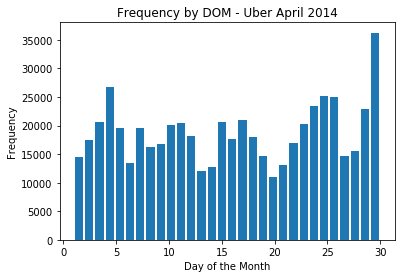

In [18]:
hist(data.dom, bins = 30,rwidth = .8)
xlabel('Day of the Month')
ylabel('Frequency')
title('Frequency by DOM - Uber April 2014')
plt.show()

In [20]:
def count_rows(rows):
    return len(rows)
by_date=data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [22]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

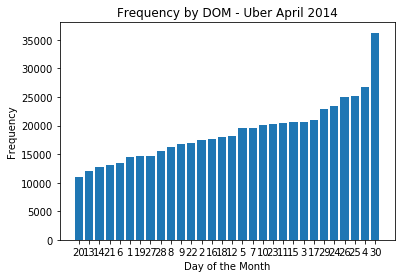

In [32]:
bar(range(1,31),by_date_sorted)
xticks(range(1,31),by_date_sorted.index)
xlabel('Day of the Month')
ylabel('Frequency')
title('Frequency by DOM - Uber April 2014')
plt.show()

''

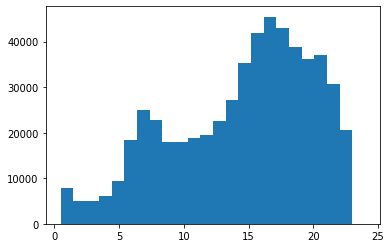

In [35]:
hist(data.Hour, bins=24, range=(.5,24))
;

''

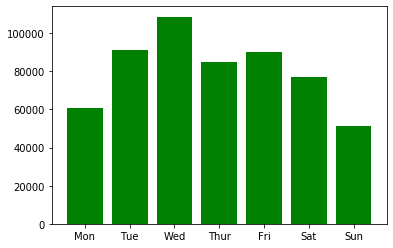

In [41]:
hist(data.weekday, bins= 7, range=(-.5,6.5),rwidth = .8, color ='g')
xticks(range(7),'Mon Tue Wed Thur Fri Sat Sun'.split())
;

In [46]:
by_cross=data.groupby('weekday Hour'.split()).apply(count_rows).unstack()

In [47]:
by_cross

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


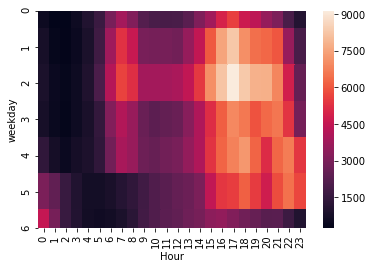

In [48]:
sns.heatmap(by_cross)

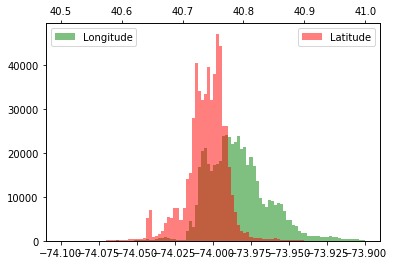

In [58]:
hist(data['Lon'], bins= 100, range=(-74.1,-73.9), color='g',alpha=.5,label ='Longitude')
plt.legend(loc='upper left')
twiny()

hist(data['Lat'], bins = 100, range= (40.5, 41), color = 'r', alpha = .5,label = 'Latitude')
plt.legend(loc = 'best')
plt.show()

(40.7, 41)

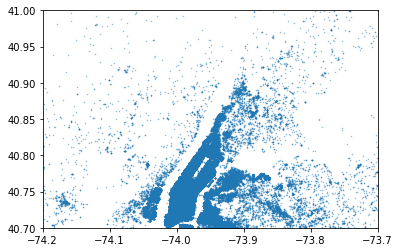

In [60]:
# showing the graph in terms of Manhattan area where the uber has been reaching out max. 

plot(data['Lon'],data['Lat'],'.',ms=1,alpha =.5)
xlim(-74.2,-73.7)
ylim(40.7,41)